In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import axes3d
import tqdm
from matplotlib import cm

In [2]:
def count0or10(target=None):
    total = sum(target)
    anyAce = target==0
    i=0
    for i in range(sum(anyAce)):
        if total+10 >20:
            break
        else:
            total+=10
    return total

In [3]:
def init():
    player = np.random.choice(13,2)
    dealer = np.random.choice(13,2)
    player[player>9]=9
    dealer[dealer>9]=9
    return player,dealer

In [4]:
q = 0*np.ones((10,10,2))
r = np.zeros((10,10,2))
# p = np.hstack((np.random.choice(2,(10,8)),np.zeros((10,2))))
p = 0*np.ones((10,10))

qa = 0*np.ones((10,10,2))
ra = np.zeros((10,10,2))
# pa = np.hstack((np.random.choice(2,(10,8)),np.zeros((10,2))))
pa = 0*np.ones((10,10))

for i in tqdm.tqdm(range(50000)):
    player,dealer = init()
    sapairs = []
    
    # draw card until 11 first to get state parameter
    total = count0or10(player)
    while total<11:
        player = np.append(player,np.random.choice(13))
        player[player>9]=9
        total = count0or10(player)
    total = count0or10(player)
    hasace = player==0
    if sum(hasace) > 0:
        a = pa[dealer[0],total-11]
        sapairs.append((total-11,a,1))
    else:
        a = p[dealer[0],total-11]
        sapairs.append((total-11,a,0))
    
    # following policy to get action 
    while a==1:
#     if a==1:
        player = np.append(player,np.random.choice(13))
        player[player>9]=9
        hasace = player==0
        if sum(hasace) > 0:
            a = pa[dealer[0],total-11]
        else:
            a = p[dealer[0],total-11]
#         print(a)
        total = count0or10(player)
        if total<20:
            if sum(hasace) > 0:
                sapairs.append((total-11,a,1))
            else:
                sapairs.append((total-11,a,0))    
        else:
            break
    
    # result 
    dp = count0or10(dealer)
    tp = count0or10(player)
    if tp>20 and dp>20:
        result = 0
    else:
        if tp==dp: result=0
        if tp==20: result=1
        if dp==20: result=-1
        if tp>dp: 
            result=1
        else:
            result=-1

    # store each s,a pair 
    for (s,a,ace) in sapairs:
#         print(s,a)
        if ace:
            ra[dealer[0],s,int(a)] += result
            qa[dealer[0],s,int(a)] = ra[dealer[0],s,int(a)]/(i+1)
        else:
            r[dealer[0],s,int(a)] += result
            q[dealer[0],s,int(a)] = r[dealer[0],s,int(a)]/(i+1)
    # adjust policy
    pa[qa[:,:,0]>qa[:,:,1]]=0
    pa[qa[:,:,0]<qa[:,:,1]]=1
    p[q[:,:,0]>q[:,:,1]]=0
    p[q[:,:,0]<q[:,:,1]]=1
    p[:,-2:]=0
    pa[:,-2:]=0
        
    

100%|██████████| 50000/50000 [00:09<00:00, 5255.05it/s]


Text(0.5, 1.0, 'No ace')

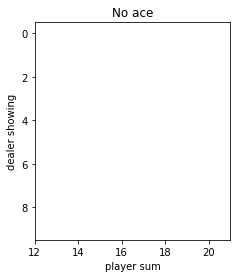

In [9]:
# plt.subplot(1,2,1);plt.imshow(0*np.ones((10,10)))
# plt.subplot(1,2,2);
ax = plt.imshow(p)
plt.xlabel('player sum')
plt.xlim([12,21])
plt.ylabel('dealer showing')
plt.title('No ace')

Text(0.5, 1.0, 'With ace(s)')

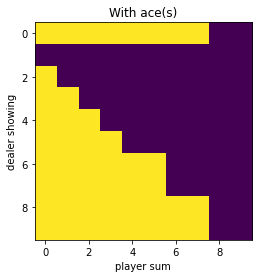

In [6]:
plt.imshow(pa)
plt.xlabel('player sum')
plt.ylabel('dealer showing')
plt.title('With ace(s)')

Text(0.5, 0.92, 'No ace')

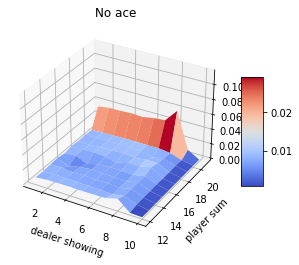

In [7]:
result = np.zeros(q.shape[:2])
result[p==0] = q[:,:,0][p==0]
result[p==1] = q[:,:,1][p==1]
fig = plt.figure()
x = np.arange(1,11,1)
y = np.arange(12,22,1)
X,Y = np.meshgrid(x,y)
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(X,Y,result,cmap=cm.coolwarm)
ax1.set_zlim(0,np.max(result)*2)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('dealer showing')
plt.ylabel('player sum')
plt.title('No ace')

Text(0.5, 0.92, 'With ace(s)')

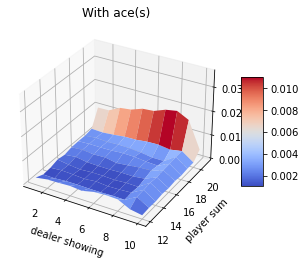

In [8]:
result = np.zeros(q.shape[:2])
result[pa==0] = qa[:,:,0][pa==0]
result[pa==1] = qa[:,:,1][pa==1]
fig = plt.figure()
x = np.arange(1,11,1)
y = np.arange(12,22,1)
X,Y = np.meshgrid(x,y)
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(X,Y,result,cmap=cm.coolwarm)
ax1.set_zlim(0,np.max(result)*2)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('dealer showing')
plt.ylabel('player sum')
plt.title('With ace(s)')
# ax1.set_aspect(.5)